In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os
import time

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm
from matplotlib import animation
from IPython.display import HTML

from itertools import zip_longest

In [2]:

np.random.seed(219)
N = 200
a = 4
b = -3
low = -3.0
high = 4.0
data_x = np.random.uniform(low=low, high=high, size=N)
data_y = np.zeros(N)
for i, x in enumerate(data_x):
  scale = - (x - low) * (x - high) / 3. + 1.5
  data_y[i] = a * x + b + np.random.normal(loc=0.0, scale=scale, size=1)

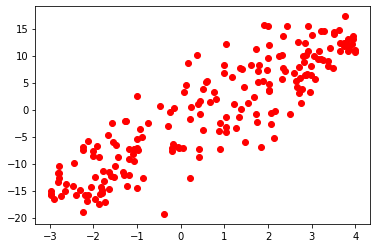

In [3]:
import matplotlib.pyplot as plt

plt.plot(data_x, data_y, 'ro')


In [4]:
w = 1.0
b = 0.0

lr = 0.1

max_epochs = 100

loss_history_gd = []
w_history_gd = []
b_history_gd = []
iteration_gd = []

In [5]:
for epoch in range(max_epochs):
    
    iteration_gd.append(epoch)
    
    # Inference : find y_pred
    y_pred = w * data_x + b 
    
    # loss_fn
    loss =  0.5 * np.mean((y_pred - data_y)**2) 
    loss_history_gd.append(loss)
    
    # loss_history.append(loss)
    w_history_gd.append(w)
    b_history_gd.append(b)
    
    # loss_derivative
    dw = np.mean((y_pred -  data_y) * data_x)
    db = np.mean(y_pred - data_y)
    
    # weights_update
    w = w - lr * dw
    b = b - lr * db

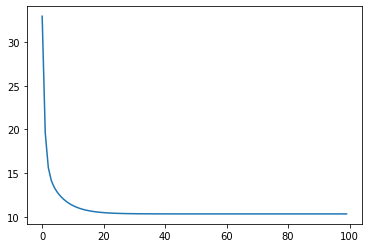

In [6]:
import matplotlib.pyplot as plt

plt.plot(iteration_gd,loss_history_gd)

In [7]:
w = 1.0
b = 0.0

lr = 0.1

max_epochs = 100

loss_history_mom = []
w_history_mom = []
b_history_mom = []
iteration_mom = []
momentum = 0.2
vw = 0.0
vb = 0.0

for epoch in range(max_epochs):
    
    iteration_mom.append(epoch)
    
    # Inference : find y_pred
    y_pred = w * data_x + b
    
    # loss_fn
    loss =  0.5 * np.mean((y_pred - data_y)**2)
    loss_history_mom.append(loss)
    
    # loss_history.append(loss)
    w_history_mom.append(w)
    b_history_mom.append(b)
    
    # loss_derivative
    dw = np.mean((y_pred -  data_y) * data_x)
    db = np.mean(y_pred - data_y)
    
    
    # weights_update Momentum
    vw = momentum * vw - lr * dw
    w = w + vw
    vb = momentum * vb - lr * db
    b = b + vb

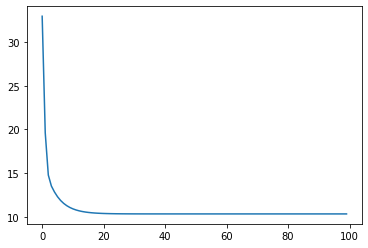

In [8]:
plt.plot(iteration_mom,loss_history_mom)

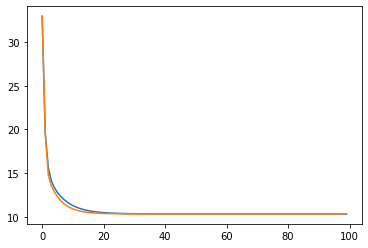

In [9]:
plt.plot(iteration_gd,loss_history_gd)

plt.plot(iteration_mom,loss_history_mom)